In [12]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from scipy.optimize import minimize
import scipy.constants as const

In [13]:
#cuts off a distance array such that it only has elements < a certain length

def dist_cutoff(dist, dist_lim):
    distance = []
    for x in dist:
        if (x < dist_lim):
            distance.append(x)
    return np.asarray(distance)

In [14]:
#cuts off a density array at a given number of elements
#not in place

def dens_cutoff(dens, n_elements):
    densities = np.zeros(n_elements)
    for i in range(0, n_elements):
        densities[i] = dens[i]
    return densities

In [15]:
def beta(f , rc):
    f = f * 1e15
    hbar = const.hbar
    c = const.c
    G = const.G
    GeV_to_J = 1.60218e-10
    prefactor = 6.9e-9 * (rc ** (-2))
    factor = (hbar * (c**5)) / (32 * np.pi * G * f**2) 
    return prefactor*factor / ((GeV_to_J)**2)

In [16]:
#analytic profile of the core

def broken_power_fun(rc, rho, exp_inner, exp_outer, r):
    #b = beta(f, rc)
    #rho = (1.9e7 / (rc**4))
    #i1term = 1. + 2.6*i1(b)
    #exp_inner = 2. - ((1./5.) * i2(b))
    #exp_outer = -8. + ((22./5.)*i3(b))
    term = (1 + 0.091 * (r/rc)**exp_inner)**exp_outer
    return 10**rho * term

In [17]:
#X2 function for simple fit

def X2_fun_broken(x, dist, dens, dist_lim):
    rc = x[0]
    rho = x[1] 
    exp_inner = x[2]
    exp_outer = x[3]
    r = dist_cutoff(dist, dist_lim)
    densities = dens_cutoff(dens, len(r))
    X2 = (((broken_power_fun(rc, rho, exp_inner, exp_outer, r)) - densities)**2)
    return X2[0:len(X2)].sum()

In [37]:
#radial-density fitting function
#params are two nparrays
#analytic radial profile function

def fit_profile_broken(dist, dens, dist_lim):
    dist1 = np.sort(dist)
    dens1 = (-1)*(np.sort(dens*(-1)))
    params = (dist1, dens1, dist_lim)
    p = (0.17, 8, 2, -8)
    x0 = np.asarray(p)
    result = minimize(X2_fun_broken, x0, args = params, bounds = [(.01, 1), (5, 12), (0, 5), (-10, 5)])
    return result

      fun: 3.836629693047421e+16
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.30662808e+16,  7.82072000e+13, -2.11667840e+15,  6.96328800e+14])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 360
      nit: 35
   status: 0
  success: True
        x: array([ 0.07969101, 11.00268554,  1.9749328 , -5.39974352])


(0.01, 25.118864315095795)

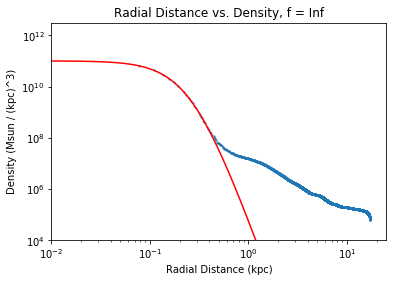

In [38]:
path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1484L20T4n40r256/radial0040.h5'
hf125 = h5py.File(path125, 'r')
dist125 = np.array(hf125['distances'])
dens125 = np.array(hf125['densities'])
res = fit_profile_broken(dist125, dens125, 0.65)
rc125 = np.abs(res.x[0])
rho125 = res.x[1]
exp_inner125 = res.x[2]
exp_outer125 = res.x[3]
print(res)
plt.scatter(dist125, dens125, s = 1)
test_dist = np.linspace(0.01, 15, 100000)
plt.plot(test_dist, broken_power_fun(rc125, rho125, exp_inner125, exp_outer125, test_dist), 'r')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('Density (Msun / (kpc)^3)')
plt.title('Radial Distance vs. Density, f = Inf')
plt.ylim(10**4, 10**(12.5))
plt.xlim(10**(-2), 10**(1.4))

#plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/simple_function/)

In [111]:
# In simple fit case, computing rc as a function of f
f_vals = [np.Inf, 4, 2, 1.75, 1.5, 1.25, 1.1875, 1.1562, 1.1484]
f = np.asarray(f_vals)
rc_vals = np.zeros(len(f_vals))
rho_vals = np.zeros(len(f_vals))
exp_inner_vals = np.zeros(len(f_vals))
exp_outer_vals = np.zeros(len(f_vals))
X2_vals = np.zeros(len(f_vals))


pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/rad_filesradial0400.h5'
path4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r256/radial0400.h5'
path2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r256/radial0400.h5'
path175 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.75L20T4n40r256/radial0040.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0400.h5'
path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.25L20T4n40r256/radial0040.h5'
path11875 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1875L20T4n40r256/radial0040.h5'
path11562 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1562L20T4n40r256/radial0040.h5'
path11484 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1484L20T4n40r256/radial0040.h5'

paths = [pathInf, path4, path2, path175, path15, path125, path11875, path11562, path11484]
for i in range(0, len(paths)):
    f_val = f_vals[i]
    hf = h5py.File(paths[i], 'r')
    dist = np.array(hf['distances'])
    dens = np.array(hf['densities'])
    res = fit_profile_broken(dist, dens, 0.65)
    
    #params
    rc = np.abs(res.x[0])
    rho = res.x[1]
    exp_inner = res.x[2]
    exp_outer = res.x[3]
    X2_val = res.fun
    
    plt.scatter(dist, dens, s = 1)
    plt.plot(dist, broken_power_fun(rc, rho, exp_inner, exp_outer, dist), 'r')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('Density (Msun / (kpc)^3)')
    plt.title('Radial Distance vs. Density, f = ' + str(f_val))
    plt.ylim(10**4, 10**(12.5))
    plt.xlim(10**(-2), 10**(1.4))
    plt.legend(['rc = ' + "%.2f" % rc + "\nrho = 10^" + "%.2f" % rho +  "\nexp_inner = " + "%.2f" % exp_inner + "\nexp_outer = " + "%.2f" % exp_outer])
    plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/broken_power_fit_f' + str(f_val) + '.png', dpi = 200)
    plt.clf()
    
    # saving values to arrays
    rc_vals[i] = np.abs(rc)
    rho_vals[i] = rho
    exp_inner_vals[i] = exp_inner
    exp_outer_vals[i] = exp_outer
    X2_vals[i] = X2_val

#rc plot
plt.scatter((f**-1), rc_vals)
plt.xlabel('1/f')
plt.ylabel('rc')
plt.title('f^-1 vs. rc (Broken Power)')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/rc_scaling.png', dpi = 200)
plt.clf()

#rho plot
plt.scatter((f**-1), rho_vals)
plt.xlabel('1/f')
plt.ylabel('rho')
plt.title('f^-1 vs. rho (Broken Power)')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/rho_scaling.png', dpi = 200)
plt.clf()

#exp outer plot
plt.scatter((f**-1), exp_outer_vals)
plt.xlabel('1/f')
plt.ylabel('exp_outer')
plt.title('f^-1 vs. exp_outer (Broken Power)')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/exp_outer_scaling.png', dpi = 200)
plt.clf()

#exp inner plot
plt.scatter((f**-1), exp_inner_vals)
plt.xlabel('1/f')
plt.ylabel('exp_inner')
plt.title('f^-1 vs. exp_inner (Broken Power)')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/exp_inner_scaling.png', dpi = 200)
plt.clf()

#exp outer plot
plt.scatter((f**-1), X2_vals)
plt.xlabel('1/f')
plt.ylabel('X2')
plt.title('f^-1 vs. X2 (Broken Power)')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/X2_scaling.png', dpi = 200)
plt.clf()

params = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/broken_params.h5', 'w')
params.create_dataset('f', data=f_vals)
params.create_dataset('rc', data=rc_vals)
params.create_dataset('rho', data=rho_vals)
params.create_dataset('exp_outer', data=exp_outer_vals)
params.create_dataset('exp_inner', data=exp_inner_vals)
params.create_dataset('X2', data=X2_vals)
params.close()

<Figure size 432x288 with 0 Axes>

In [112]:
# Let's try to compute rc as a function of f:
# Trying to fit a Gaussian
def Gauss(r, a, b, c):
    return a * np.exp(-1*((r)/b)**c)

#X2 function for Gauss
def X2_fun_Gauss(x, dist, dens):
    #args[0] = f 
    #args[1] = dist 
    #args[2] = dens 
    #args[3] = dist_lim
    rc = x[0]
    rho = x[1] 
    a = x[2]
    #r = dist_cutoff(dist, dist_lim)
    #densities = dens_cutoff(dens, len(r))
    X2 = (((Gauss(dist, rc, rho, a)) - (dens))**2)
    return X2[0:(len(X2))].sum()

#fitting function
def fit_profile_Gauss(dist, dens):
    #dist1 = np.sort(dist)
    #dens1 = (-1)*(np.sort(dens*(-1)))
    params = (dist, dens)
    p = (0.2, 0.18, 1.5)
    x0 = np.asarray(p)
    result = minimize(X2_fun_Gauss, x0, args = params, bounds = [(0.0001, 1), (0, 3), (0.5, 100)])
    return result

In [154]:
hf = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_function_params.h5', 'w')
hf.close()

      fun: 0.0002034741222833604
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.18176443e-06, 6.32884045e-07, 2.51101223e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 116
      nit: 25
   status: 0
  success: True
        x: array([0.17189757, 0.98974647, 2.88784476])
[1.98750829e-03 6.96619227e-05 9.94156617e-03 5.36900953e-03
 4.29351650e-03 2.88252686e-04 2.18495970e-03 2.62649694e-03
 6.45508872e-03]


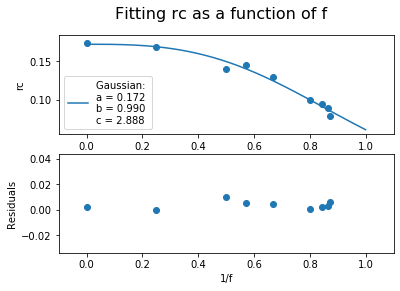

In [155]:
philip = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/broken_params.h5', 'r')
f_inv = 1/np.array(philip['f'])
rc = np.array(philip['rc'])
res = fit_profile_Gauss(f_inv, rc)
print(res)

a = res.x[0]
b = res.x[1]
c = res.x[2]

x_axis = np.linspace(0, 1, 1000)
y_axis = Gauss(x_axis, a, b, c)

fig, axs = plt.subplots(2, 1)
axs[0].plot(x_axis, y_axis, label= 'Gaussian: \n' + 'a = ' + "%.3f" % a + "\nb = " + "%.3f" % b + "\nc = " + "%.3f" % c)
axs[0].scatter(f_inv, rc)
axs[0].set_xlim(-0.1, 1.1)
axs[0].set_ylabel('rc')
axs[0].legend(loc="lower left")

residuals = np.abs(rc - Gauss(f_inv, a, b, c))
print(residuals)
axs[1].scatter(f_inv, residuals)
axs[1].set_xlim(-0.1, 1.1)
axs[1].set_ylabel('Residuals')

plt.xlabel('1/f')

fig.suptitle('Fitting rc as a function of f', fontsize=16)
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_rc.png', dpi = 150)

p = [a, b, c]
gauss = np.array(p)
hf = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_function_params.h5', 'a')
hf.create_dataset('rc Gaussian', data=gauss)
hf.close()


In [115]:
def core_rad(f):
    a = 0.17
    b = 0.99
    c = 2.89
    return a * np.exp(-1*((1/f)/b)**c)

In [116]:
print(core_rad(2))

0.14795661827780018


Fitting rho as a function of f

In [119]:
philip = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/broken_params.h5', 'r')
f_inv = 1/np.array(philip['f'])
rho = np.array(philip['rho'])

[ 1.71794301 -0.91341917  0.26510171 10.25315279]
[0.00791116 0.03416455 0.07240428 0.02267053 0.0145049  0.02538646
 0.02748257 0.0330935  0.07698706]


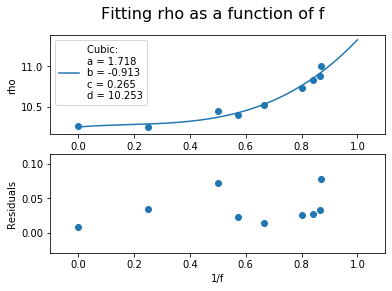

In [156]:
# trying a polyfit:
res_rho = np.polyfit(f_inv, rho, 3)
print(res_rho)
den = lambda f: res_rho[0]*f**3 + res_rho[1]*f**2 + res_rho[2]*f + res_rho[3]
points = np.linspace(0, 1, 1000)
#plt.plot(points, den(points))
#plt.scatter(f_inv, rho)
#plt.clf()
fig, axs = plt.subplots(2, 1)
axs[0].plot(points, den(points), label= 'Cubic: \n' + 'a = ' + "%.3f" % res_rho[0] + "\nb = " + "%.3f" % res_rho[1] + "\nc = " + "%.3f" % res_rho[2]+ "\nd = " + "%.3f" % res_rho[3])
axs[0].scatter(f_inv, rho)
axs[0].set_xlim(-0.1, 1.1)
axs[0].set_ylabel('rho')
axs[0].legend(loc="upper left")

residuals = np.abs(rho - den(f_inv))
print(residuals)
axs[1].scatter(f_inv, residuals)
axs[1].set_xlim(-0.1, 1.1)
axs[1].set_ylabel('Residuals')

plt.xlabel('1/f')

fig.suptitle('Fitting rho as a function of f', fontsize=16)
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_rho.png', dpi = 150)

p = [res_rho[0], res_rho[1], res_rho[2], res_rho[3]]
rho_cubic = np.array(p)
hf = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_function_params.h5', 'a')
hf.create_dataset('rho cubic', data=rho_cubic)
hf.close()

Fitting exp_inner as a function of f

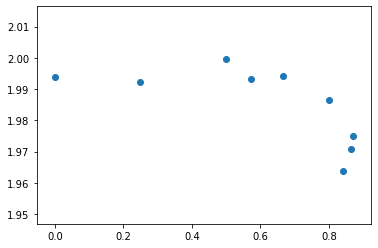

In [127]:
philip = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/broken_params.h5', 'r')
f_inv = 1/np.array(philip['f'])
exp_inner = np.array(philip['exp_inner'])
plt.scatter(f_inv, exp_inner)

[-0.22732621  0.21846671 -0.04569297  1.99391194]
[2.80372236e-05 2.05888428e-04 2.25203543e-03 3.56060556e-03
 1.13532347e-03 5.81129555e-03 1.07842275e-02 7.13533167e-05
 5.25267651e-03]


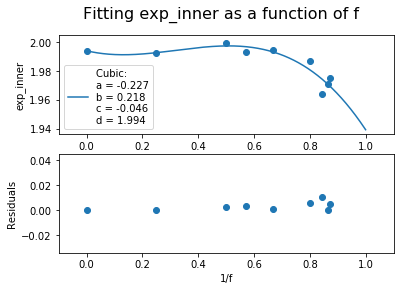

In [158]:
# trying a polyfit:
res_exp_inner = np.polyfit(f_inv, exp_inner, 3)
print(res_exp_inner)
exp_in = lambda f: res_exp_inner[0]*f**3 + res_exp_inner[1]*f**2 + res_exp_inner[2]*f + res_exp_inner[3]
points = np.linspace(0, 1, 1000)
#plt.plot(points, den(points))
#plt.scatter(f_inv, rho)
#plt.clf()
fig, axs = plt.subplots(2, 1)
axs[0].plot(points, exp_in(points), label= 'Cubic: \n' + 'a = ' + "%.3f" % res_exp_inner[0] + "\nb = " + "%.3f" % res_exp_inner[1] + "\nc = " + "%.3f" % res_exp_inner[2]+ "\nd = " + "%.3f" % res_exp_inner[3])
axs[0].scatter(f_inv, exp_inner)
axs[0].set_xlim(-0.1, 1.1)
axs[0].set_ylabel('exp_inner')
axs[0].legend(loc="lower left")

residuals = np.abs(exp_inner - exp_in(f_inv))
print(residuals)
axs[1].scatter(f_inv, residuals)
axs[1].set_xlim(-0.1, 1.1)
axs[1].set_ylabel('Residuals')

plt.xlabel('1/f')

fig.suptitle('Fitting exp_inner as a function of f', fontsize=16)
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_exp_inner.png', dpi = 150)

p = [res_exp_inner[0], res_exp_inner[1], res_exp_inner[2], res_exp_inner[3]]
exp_inner_cubic = np.array(p)
hf = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_function_params.h5', 'a')
hf.create_dataset('exp_inner cubic', data=exp_inner_cubic)
hf.close()

Fitting exp_outer as a function of f

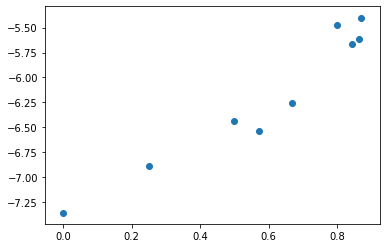

In [144]:
philip = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/broken_params.h5', 'r')
f_inv = 1/np.array(philip['f'])
exp_outer = np.array(philip['exp_outer'])
plt.scatter(f_inv, exp_outer)

[-13.42957297  27.43383877 -16.56694979   4.64903212  -7.36070824]
[0.00394399 0.02753295 0.15399605 0.1134515  0.10587639 0.22258254
 0.10327138 0.11259964 0.08220928]


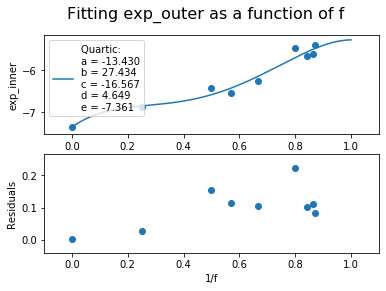

In [166]:
# trying a polyfit:
res_exp_outer = np.polyfit(f_inv, exp_outer, 4)
print(res_exp_outer)
exp_out = lambda f: res_exp_outer[0]*f**4 + res_exp_outer[1]*f**3 + res_exp_outer[2]*f**2 + res_exp_outer[3]*f +res_exp_outer[4]
points = np.linspace(0, 1, 1000)
#plt.plot(points, den(points))
#plt.scatter(f_inv, rho)
#plt.clf()
fig, axs = plt.subplots(2, 1)
axs[0].plot(points, exp_out(points), label= 'Quartic: \n' + 'a = ' + "%.3f" % res_exp_outer[0] + "\nb = " + "%.3f" % res_exp_outer[1] + "\nc = " + "%.3f" % res_exp_outer[2] + "\nd = " + "%.3f" % res_exp_outer[3] + "\ne = " + "%.3f" % res_exp_outer[4])
axs[0].scatter(f_inv, exp_outer)
axs[0].set_xlim(-0.1, 1.1)
axs[0].set_ylabel('exp_inner')
axs[0].legend(loc="upper left")

residuals = np.abs(exp_outer - exp_out(f_inv))
print(residuals)
axs[1].scatter(f_inv, residuals)
axs[1].set_xlim(-0.1, 1.1)
axs[1].set_ylabel('Residuals')

plt.xlabel('1/f')

fig.suptitle('Fitting exp_outer as a function of f', fontsize=16)
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_exp_outer.png', dpi = 150)

p = [res_exp_outer[0], res_exp_outer[1], res_exp_outer[2], res_exp_outer[3], res_exp_outer[4]]
exp_outer_quartic = np.array(p)
hf = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_function_params.h5', 'a')
hf.create_dataset('exp_outer quartic', data=exp_outer_quartic)
hf.close()

In [169]:
hf = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_function_params.h5', 'a')
print(hf.keys())
rc = np.array(hf['rc Gaussian'])
rho = np.array(hf['rho cubic'])
exp_in = np.array(hf['exp_inner cubic'])
exp_out = np.array(hf['exp_outer quartic'])
print("rc:")
print(rc)
print("rho:")
print(rho)
print("exp_in:")
print(exp_in)
print("exp_out:")
print(exp_out)
hf.close()

<KeysViewHDF5 ['exp_inner cubic', 'exp_outer cubic', 'exp_outer quartic', 'rc Gaussian', 'rho cubic']>
rc:
[0.17189757 0.98974647 2.88784476]
rho:
[ 1.71794301 -0.91341917  0.26510171 10.25315279]
exp_in:
[-0.22732621  0.21846671 -0.04569297  1.99391194]
exp_out:
[-13.42957297  27.43383877 -16.56694979   4.64903212  -7.36070824]


In [171]:
#broken power model function
def broken_power_model(f_val, r):
    f = 1/f_val
    hf = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fitting_function_params.h5', 'r')
    # rc function
    rc_params = np.array(hf['rc Gaussian'])
    rc = lambda x: rc_params[0] * np.exp(-1*((x)/rc_params[1])**rc_params[2])
    # rho function
    rho_params = np.array(hf['rho cubic'])
    rho = lambda x: rho_params[0]*x**3 + rho_params[1]*x**2 + rho_params[2]*x + rho_params[3]
    #exp_inner fitting
    exp_inner_params = np.array(hf['exp_inner cubic'])
    exp_inner = lambda x: exp_inner_params[0]*x**3 + exp_inner_params[1]*x**2 + exp_inner_params[2]*x + exp_inner_params[3]
    #exp_outer fitting
    exp_outer_params = np.array(hf['exp_outer quartic'])
    exp_outer = lambda x: exp_outer_params[0]*x**4 + exp_outer_params[1]*x**3 + exp_outer_params[2]*x**2 + exp_outer_params[3]*x + exp_outer_params[4]
    return broken_power_fun(rc(f), rho(f), exp_inner(f), exp_outer(f), r)

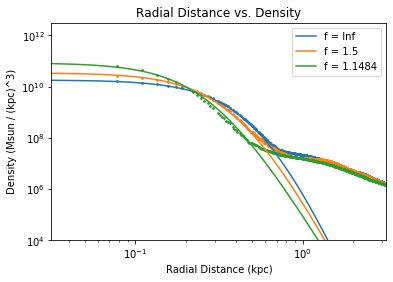

In [194]:
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/rad_filesradial0400.h5'
path11484 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1484L20T4n40r256/radial0040.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0400.h5'

hfInf = h5py.File(pathInf, 'r')
distInf = np.array(hfInf['distances'])
densInf = np.array(hfInf['densities'])
hfInf.close()

hf15 = h5py.File(path15, 'r')
dist15 = np.array(hf15['distances'])
dens15 = np.array(hf15['densities'])
hf15.close()

hf11484 = h5py.File(path11484, 'r')
dist11484 = np.array(hf11484['distances'])
dens11484 = np.array(hf11484['densities'])
hf11484.close()

errorsInf = np.zeros(len(densInf))
errors15 = np.zeros(len(densInf))
errors11484 = np.zeros(len(densInf))

plt.scatter(distInf, densInf, s = 3)
plt.scatter(dist15, dens15, s = 3)
plt.scatter(dist11484, dens11484, s = 3)

x = np.linspace(0,15, 10000)
plt.plot(x, broken_power_model(np.Inf, x))
plt.plot(x, broken_power_model(1.5, x))
plt.plot(x, broken_power_model(1.1484, x))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('Density (Msun / (kpc)^3)')
plt.title('Radial Distance vs. Density')
plt.ylim(10**4, 10**(12.5))
plt.xlim(10**(-1.5), 10**(0.5))
plt.legend(['f = Inf', 'f = 1.5','f = 1.1484'])

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/broken_power_law_function/fit_function_test.png', dpi = 150)